## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  16.299080  1645.689960  0.635319   8.409160  1.438626
1  93.818250  1240.194682  0.918018  10.436093  1.462126
2  23.423746   834.197964  0.662841   5.016704  1.458911
3  40.067589  1534.391216  0.078563   7.738231  1.134050
4  43.705099  1173.777615  0.094937   5.481762  1.263733


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9503907	total: 57.6ms	remaining: 57.6s
1:	learn: 0.9428285	total: 58.2ms	remaining: 29.1s
2:	learn: 0.9344803	total: 58.8ms	remaining: 19.5s
3:	learn: 0.9262520	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9150218	total: 59.8ms	remaining: 11.9s
5:	learn: 0.9077486	total: 60.3ms	remaining: 9.99s
6:	learn: 0.8970581	total: 60.8ms	remaining: 8.63s
7:	learn: 0.8868706	total: 61.3ms	remaining: 7.6s
8:	learn: 0.8789181	total: 61.8ms	remaining: 6.8s
9:	learn: 0.8693778	total: 62.4ms	remaining: 6.17s
10:	learn: 0.8621325	total: 62.9ms	remaining: 5.66s
11:	learn: 0.8545954	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8472211	total: 64ms	remaining: 4.86s
13:	learn: 0.8406792	total: 64.4ms	remaining: 4.54s
14:	learn: 0.8306436	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8221428	total: 65.4ms	remaining: 4.02s
16:	learn: 0.8143233	total: 66.1ms	remaining: 3.82s
17:	learn: 0.8065733	total: 66.8ms	remaining: 3.64s
18:	learn: 0.8003566	total: 67.2ms	remaining: 3.

107:	learn: 0.4069589	total: 105ms	remaining: 869ms
108:	learn: 0.4041179	total: 106ms	remaining: 866ms
109:	learn: 0.4018087	total: 106ms	remaining: 860ms
110:	learn: 0.3994717	total: 107ms	remaining: 855ms
111:	learn: 0.3975256	total: 107ms	remaining: 849ms
112:	learn: 0.3945928	total: 108ms	remaining: 844ms
113:	learn: 0.3919608	total: 108ms	remaining: 839ms
114:	learn: 0.3894247	total: 108ms	remaining: 834ms
115:	learn: 0.3866228	total: 108ms	remaining: 827ms
116:	learn: 0.3839945	total: 109ms	remaining: 822ms
117:	learn: 0.3817778	total: 109ms	remaining: 816ms
118:	learn: 0.3797459	total: 110ms	remaining: 812ms
119:	learn: 0.3775531	total: 110ms	remaining: 808ms
120:	learn: 0.3751825	total: 110ms	remaining: 803ms
121:	learn: 0.3730463	total: 111ms	remaining: 798ms
122:	learn: 0.3708297	total: 111ms	remaining: 794ms
123:	learn: 0.3682971	total: 112ms	remaining: 788ms
124:	learn: 0.3664978	total: 112ms	remaining: 784ms
125:	learn: 0.3640708	total: 112ms	remaining: 779ms
126:	learn: 

291:	learn: 0.1588352	total: 185ms	remaining: 449ms
292:	learn: 0.1580910	total: 186ms	remaining: 448ms
293:	learn: 0.1574116	total: 186ms	remaining: 447ms
294:	learn: 0.1568902	total: 187ms	remaining: 446ms
295:	learn: 0.1562178	total: 187ms	remaining: 445ms
296:	learn: 0.1556608	total: 188ms	remaining: 444ms
297:	learn: 0.1551093	total: 188ms	remaining: 443ms
298:	learn: 0.1545565	total: 189ms	remaining: 443ms
299:	learn: 0.1540688	total: 190ms	remaining: 442ms
300:	learn: 0.1534809	total: 190ms	remaining: 442ms
301:	learn: 0.1527336	total: 191ms	remaining: 441ms
302:	learn: 0.1520138	total: 191ms	remaining: 440ms
303:	learn: 0.1515302	total: 192ms	remaining: 439ms
304:	learn: 0.1508634	total: 192ms	remaining: 437ms
305:	learn: 0.1502109	total: 192ms	remaining: 436ms
306:	learn: 0.1494248	total: 193ms	remaining: 435ms
307:	learn: 0.1489573	total: 193ms	remaining: 434ms
308:	learn: 0.1482589	total: 194ms	remaining: 433ms
309:	learn: 0.1475392	total: 194ms	remaining: 432ms
310:	learn: 

517:	learn: 0.0804361	total: 287ms	remaining: 268ms
518:	learn: 0.0803401	total: 288ms	remaining: 267ms
519:	learn: 0.0802464	total: 289ms	remaining: 266ms
520:	learn: 0.0799608	total: 289ms	remaining: 266ms
521:	learn: 0.0798726	total: 289ms	remaining: 265ms
522:	learn: 0.0797826	total: 290ms	remaining: 264ms
523:	learn: 0.0796976	total: 290ms	remaining: 264ms
524:	learn: 0.0796109	total: 291ms	remaining: 263ms
525:	learn: 0.0792393	total: 291ms	remaining: 262ms
526:	learn: 0.0791569	total: 292ms	remaining: 262ms
527:	learn: 0.0790764	total: 292ms	remaining: 261ms
528:	learn: 0.0789632	total: 292ms	remaining: 260ms
529:	learn: 0.0788808	total: 293ms	remaining: 260ms
530:	learn: 0.0785695	total: 293ms	remaining: 259ms
531:	learn: 0.0785103	total: 294ms	remaining: 258ms
532:	learn: 0.0784332	total: 294ms	remaining: 258ms
533:	learn: 0.0780683	total: 295ms	remaining: 257ms
534:	learn: 0.0779576	total: 295ms	remaining: 256ms
535:	learn: 0.0779001	total: 295ms	remaining: 256ms
536:	learn: 

703:	learn: 0.0564210	total: 367ms	remaining: 154ms
704:	learn: 0.0562706	total: 368ms	remaining: 154ms
705:	learn: 0.0561865	total: 368ms	remaining: 153ms
706:	learn: 0.0561636	total: 368ms	remaining: 153ms
707:	learn: 0.0561410	total: 369ms	remaining: 152ms
708:	learn: 0.0559344	total: 369ms	remaining: 152ms
709:	learn: 0.0558513	total: 370ms	remaining: 151ms
710:	learn: 0.0556135	total: 370ms	remaining: 150ms
711:	learn: 0.0554703	total: 371ms	remaining: 150ms
712:	learn: 0.0553883	total: 371ms	remaining: 149ms
713:	learn: 0.0553664	total: 371ms	remaining: 149ms
714:	learn: 0.0553447	total: 372ms	remaining: 148ms
715:	learn: 0.0552003	total: 372ms	remaining: 148ms
716:	learn: 0.0551193	total: 373ms	remaining: 147ms
717:	learn: 0.0549307	total: 373ms	remaining: 146ms
718:	learn: 0.0548507	total: 373ms	remaining: 146ms
719:	learn: 0.0546193	total: 374ms	remaining: 145ms
720:	learn: 0.0546008	total: 374ms	remaining: 145ms
721:	learn: 0.0544280	total: 374ms	remaining: 144ms
722:	learn: 

928:	learn: 0.0348302	total: 468ms	remaining: 35.8ms
929:	learn: 0.0347760	total: 469ms	remaining: 35.3ms
930:	learn: 0.0347610	total: 469ms	remaining: 34.8ms
931:	learn: 0.0346720	total: 470ms	remaining: 34.3ms
932:	learn: 0.0345848	total: 470ms	remaining: 33.8ms
933:	learn: 0.0345154	total: 471ms	remaining: 33.3ms
934:	learn: 0.0344689	total: 471ms	remaining: 32.8ms
935:	learn: 0.0343943	total: 472ms	remaining: 32.3ms
936:	learn: 0.0343408	total: 472ms	remaining: 31.8ms
937:	learn: 0.0342676	total: 473ms	remaining: 31.2ms
938:	learn: 0.0342150	total: 473ms	remaining: 30.7ms
939:	learn: 0.0341591	total: 474ms	remaining: 30.2ms
940:	learn: 0.0340797	total: 474ms	remaining: 29.7ms
941:	learn: 0.0340594	total: 475ms	remaining: 29.2ms
942:	learn: 0.0340079	total: 475ms	remaining: 28.7ms
943:	learn: 0.0339569	total: 475ms	remaining: 28.2ms
944:	learn: 0.0339426	total: 476ms	remaining: 27.7ms
945:	learn: 0.0338716	total: 476ms	remaining: 27.2ms
946:	learn: 0.0337949	total: 477ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

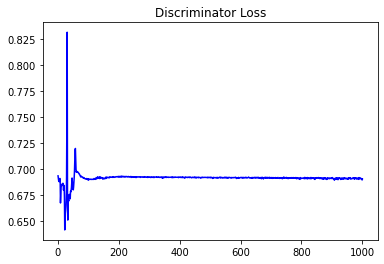

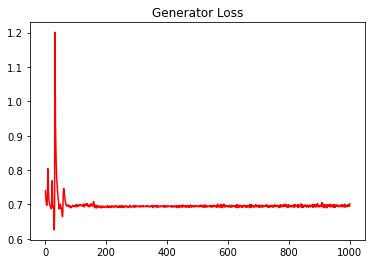

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.7667361010471224


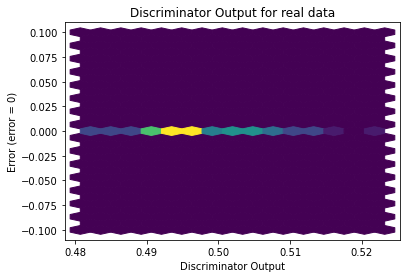

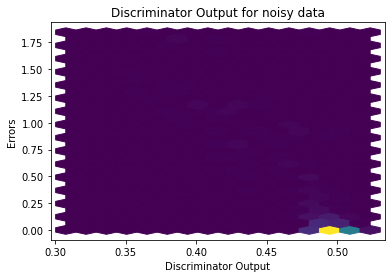

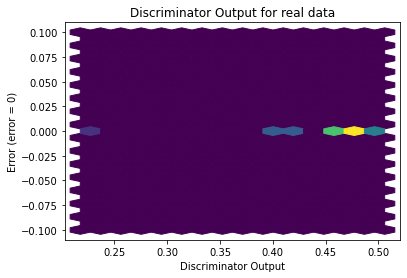

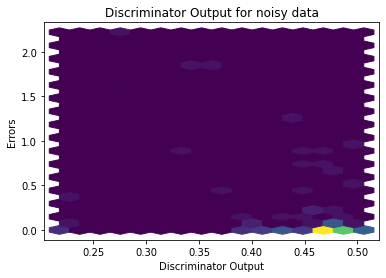

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


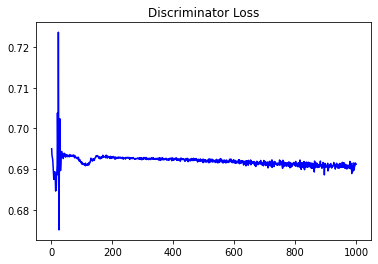

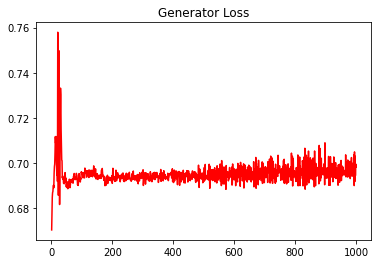

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6971940611049392


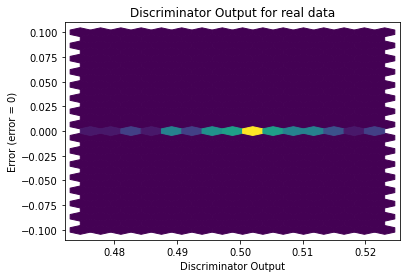

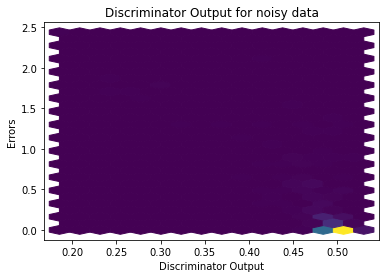

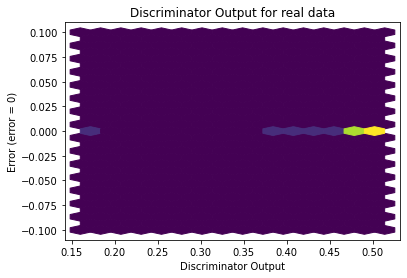

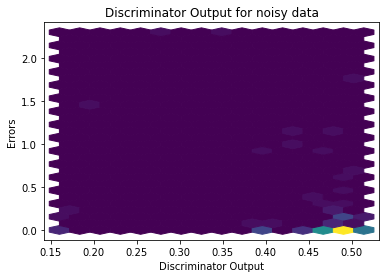

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6202]], requires_grad=True)
